<a href="https://colab.research.google.com/github/meenalnimje/Stock-prediction-LSTM-/blob/main/Stock_prediction(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [81]:
import yfinance as yf

# Define the date range
start = '2010-01-01'
end = '2024-12-10'

# Fetch the data
df = yf.download('SBIN.NS', start=start, end=end)

# Display the first few rows
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,,
2010-01-04,192.488831,229.119995,230.000000,227.500000,227.500000,11031470
2010-01-05,192.560211,229.205002,231.000000,228.009995,230.800003,11613740
2010-01-06,193.715378,230.580002,231.500000,228.500000,229.699997,14527930
2010-01-07,192.631622,229.289993,231.000000,228.110001,230.600006,8576510
2010-01-08,192.056137,228.604996,230.389999,228.009995,229.399994,10453820


In [82]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,,
2024-12-03,853.950012,853.950012,856.599976,836.900024,838.000000,12186182
2024-12-04,859.700012,859.700012,864.000000,850.299988,853.950012,10749716
2024-12-05,865.450012,865.450012,871.450012,855.599976,860.000000,14716036
2024-12-06,863.650024,863.650024,875.450012,857.000000,865.250000,14520568
2024-12-09,858.049988,858.049988,866.849976,856.950012,859.000000,9627285


In [83]:
df =df.reset_index('Date')
df.head()
df=df.drop(['Date','Adj Close'], axis=1)
df.head()



<ipython-input-83-5d582109a7c1>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date','Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
0,229.119995,230.000000,227.500000,227.500000,11031470
1,229.205002,231.000000,228.009995,230.800003,11613740
2,230.580002,231.500000,228.500000,229.699997,14527930
3,229.289993,231.000000,228.110001,230.600006,8576510
4,228.604996,230.389999,228.009995,229.399994,10453820


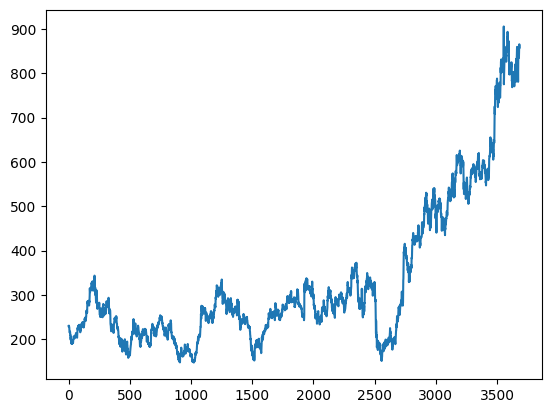

In [84]:
plt.plot(df.Close)

In [85]:
ma100=df.Close.rolling(100).mean()
ma100
ma200=df.Close.rolling(200).mean()
ma200

Ticker,SBIN.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3680,806.313001
3681,806.985251
3682,807.773001
3683,808.524001


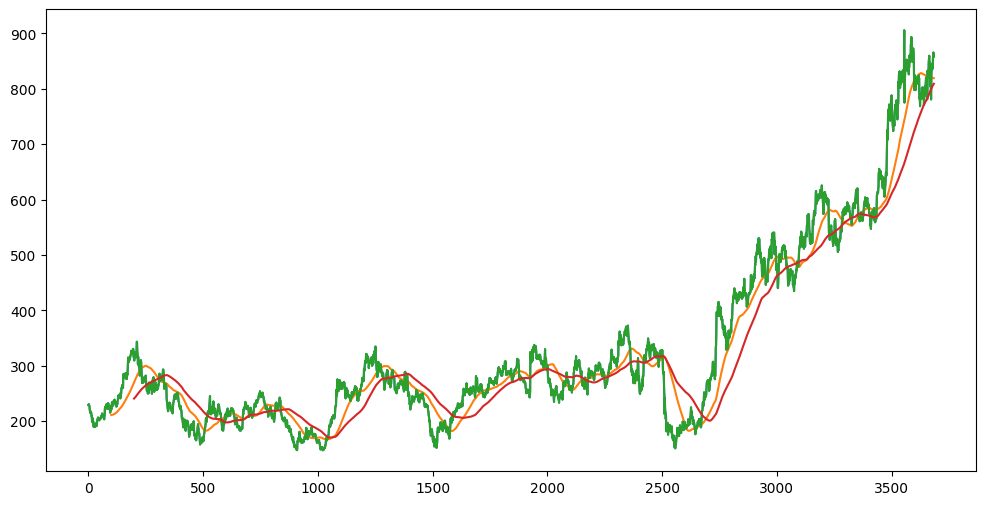

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)
plt.plot(df.Close)
plt.plot(ma200)

In [43]:
df.shape

(2515, 5)

In [87]:
# splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape )

(2579, 1)
(1106, 1)


In [88]:
data_training.head()

Ticker,SBIN.NS
0,229.119995
1,229.205002
2,230.580002
3,229.289993
4,228.604996


In [89]:
# now applying lstm
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [90]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.36331318],
       [0.36369092],
       [0.36980094],
       ...,
       [0.16503733],
       [0.17925701],
       [0.20036437]])

In [91]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [92]:
# ML model of LSTM

from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_3, built=True>

In [93]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [94]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - loss: 0.0767
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 349ms/step - loss: 0.0141
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 341ms/step - loss: 0.0108
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 321ms/step - loss: 0.0099
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - loss: 0.0084
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 350ms/step - loss: 0.0087
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 42s 368ms/step - loss: 0.0074
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 363ms/step - loss: 0.0079
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 323ms/step - loss: 0.0070
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 362ms/step - loss: 0.0069
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 341ms/step - loss: 0.0063
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 362ms/step - loss: 0.0059
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - loss: 0.0059
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - loss: 0.0053
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 

In [96]:
model.save('keras_state_model.h5')

In [61]:
data_testing.head()

Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [97]:
past100_days=data_training.tail(100)
final_df = pd.concat([past100_days, data_testing], ignore_index=True)

final_df.head()

Ticker,SBIN.NS
0,324.049988
1,316.200012
2,315.100006
3,316.450012
4,310.700012


In [98]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.22946473],
       [0.21906466],
       [0.21760731],
       ...,
       [0.94674084],
       [0.94435612],
       [0.93693689]])

In [68]:
input_data.shape

(855, 1)

In [99]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [100]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1106, 100, 1)
(1106,)


In [101]:
# make predictions
y_predicted=model.predict(x_test)
y_predicted.shape

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step


(1106, 1)

In [102]:
y_test

array([0.04471383, 0.04557498, 0.04471383, ..., 0.94674084, 0.94435612,
       0.93693689])

In [103]:
y_predicted

array([[0.05439013],
       [0.05685559],
       [0.05795592],
       ...,
       [0.8769231 ],
       [0.88523257],
       [0.8876136 ]], dtype=float32)

In [104]:
scaler.scale_

array([0.00132485])

In [105]:
scale_factor=1/scaler.scale_[0]
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
y_test

array([ 33.75      ,  34.3999939 ,  33.75      , ..., 714.6000061 ,
       712.80001831, 707.19998169])

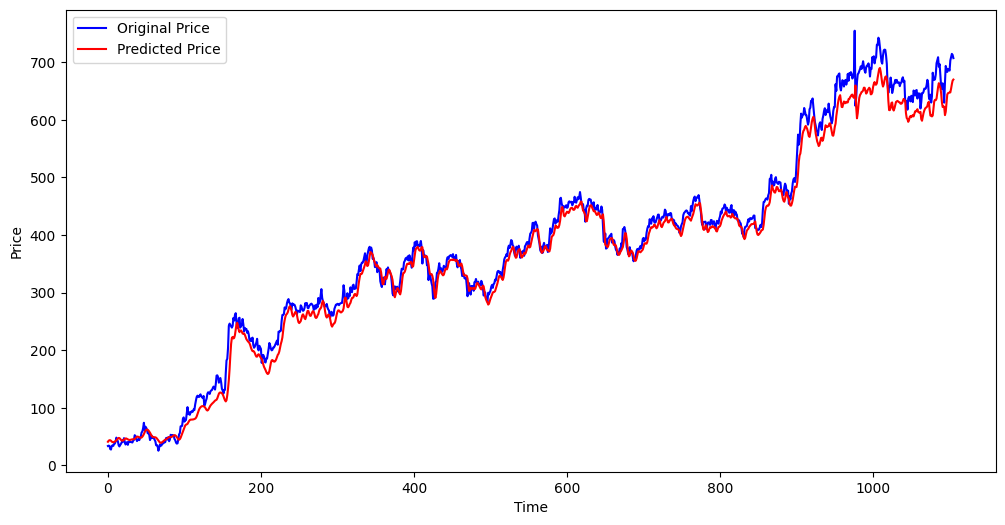

In [106]:
plt.figure(figsize=(12,6))
plt.plot(y_test,color='blue',label='Original Price')
plt.plot(y_predicted,color='red',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()